# Steps-:
1. We will load the libraries.
2. Read the dataset.
3. Split the data into train and test.
4. Train the Model over our dataset.
5. Save the Model.
6. Test the model for test datset.
7. For a image check the output.

## Using cnn for handwritten character recognition, knn and svm for handwritten digit recognition, we can recognise any word and then, we can find the similar word from a website using NLTK Library.

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

In [4]:
data = pd.read_csv(r"C:\Users\HP\Desktop\padhai\NLP\Project\A_Z Handwritten Data.csv\A_Z Handwritten Data.csv").astype('float32')

In [5]:
X = data.drop('0',axis = 1)
y = data['0']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

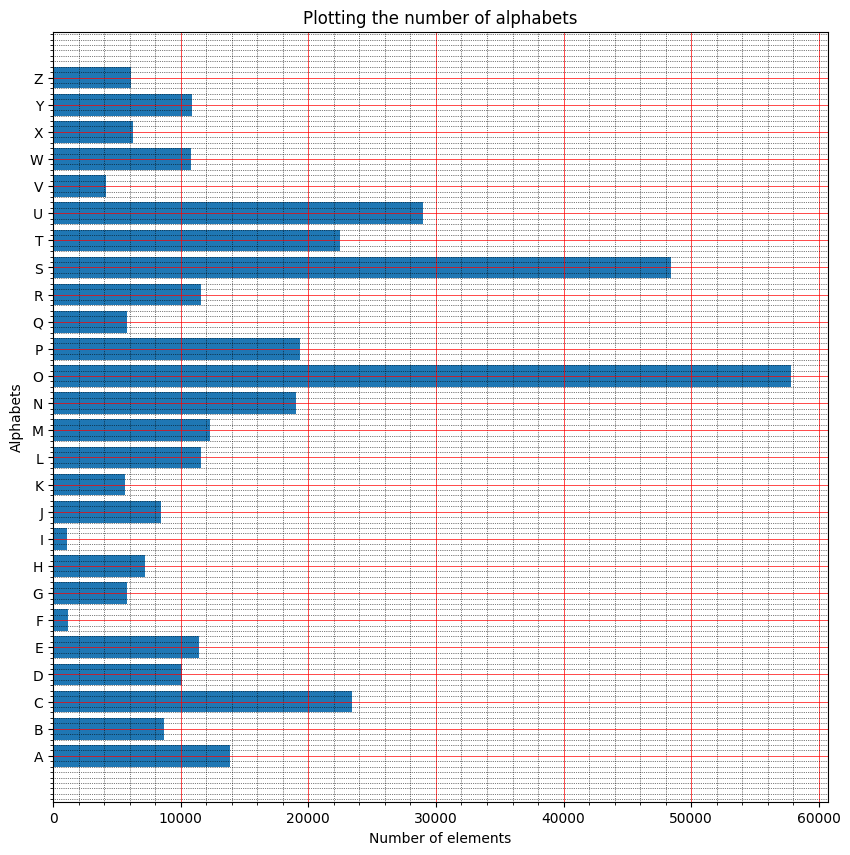

In [6]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)


fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

# naming the x axis
plt.xlabel("Number of elements")
# naming the y axis
plt.ylabel("Alphabets")
# giving a title  
plt.title("Plotting the number of alphabets")
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

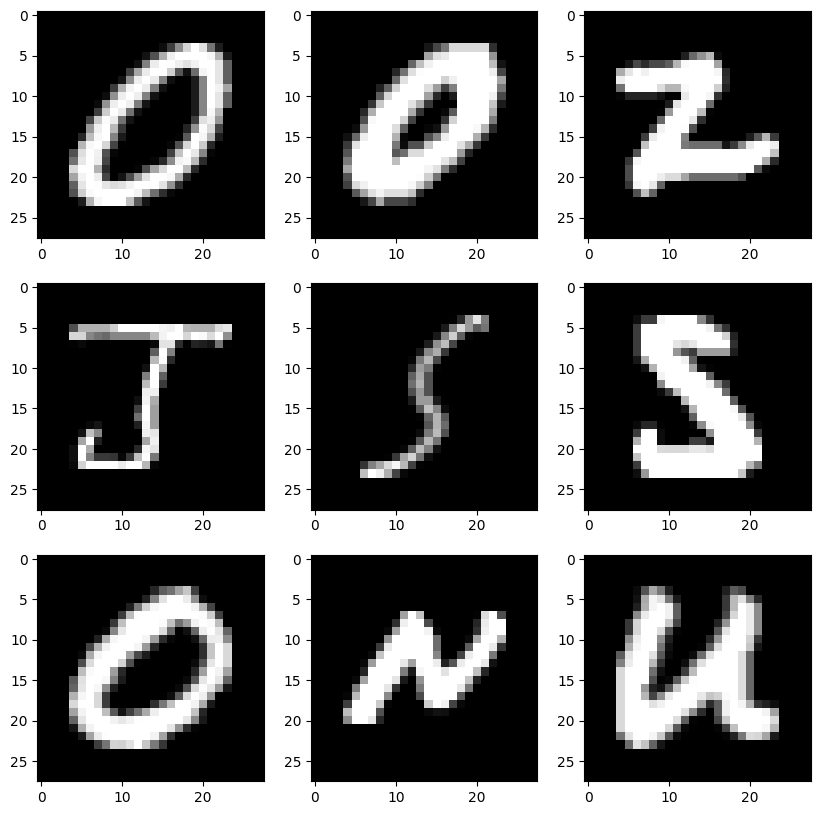

In [7]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
# Reshape data for model creation
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("The new shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("The new shape of train data: ", test_X.shape)

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("The new shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("The new shape of test labels: ", test_yOHE.shape)

The new shape of train data:  (297960, 28, 28, 1)
The new shape of train data:  (74490, 28, 28, 1)
The new shape of train labels:  (297960, 26)
The new shape of test labels:  (74490, 26)


In [9]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [10]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=20, validation_data = (test_X,test_yOHE))

Epoch 1/20
9312/9312 [==============================] - 406s 43ms/step - loss: 0.1495 - accuracy: 0.9586 - val_loss: 0.0688 - val_accuracy: 0.9809
Epoch 2/20
9312/9312 [==============================] - 407s 44ms/step - loss: 0.0719 - accuracy: 0.9803 - val_loss: 0.0590 - val_accuracy: 0.9845
Epoch 3/20
9312/9312 [==============================] - 265s 28ms/step - loss: 0.0605 - accuracy: 0.9836 - val_loss: 0.0604 - val_accuracy: 0.9842
Epoch 4/20
9312/9312 [==============================] - 227s 24ms/step - loss: 0.0548 - accuracy: 0.9853 - val_loss: 0.0677 - val_accuracy: 0.9828
Epoch 5/20
9312/9312 [==============================] - 231s 25ms/step - loss: 0.0539 - accuracy: 0.9858 - val_loss: 0.0573 - val_accuracy: 0.9854
Epoch 6/20
9312/9312 [==============================] - 229s 25ms/step - loss: 0.0520 - accuracy: 0.9866 - val_loss: 0.0674 - val_accuracy: 0.9839
Epoch 7/20
9312/9312 [==============================] - 216s 23ms/step - loss: 0.0494 - accuracy: 0.9874 - val_loss: 0

In [12]:
model.summary()
model.save(r'C:\Users\HP\Desktop\padhai\NLP\Project\A_Z Handwritten Data.csv\model_hand.h5')

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

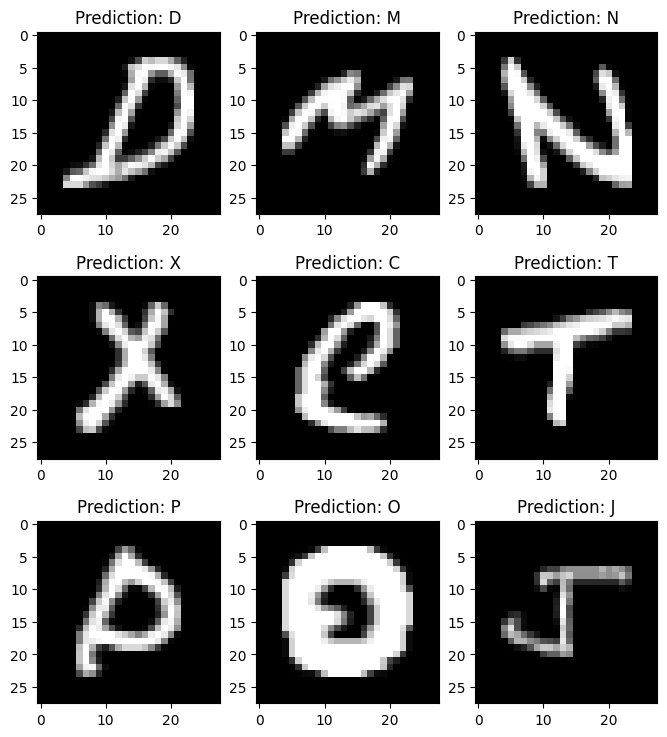

In [13]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img,  cmap=plt.get_cmap('gray'))
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)

In [1]:
img = cv2.imread(r'image.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))


img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Image Data", (100,25), cv2.FONT_HERSHEY_DUPLEX , fontScale= 1, thickness=2, color = (255,0,0))
cv2.putText(img, "Character Prediction: " + img_pred, (10,410), cv2.FONT_HERSHEY_SIMPLEX, fontScale= 1, thickness=2, color = (0,0,255))
cv2.imshow('Character Recognition', img)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined